# Workshop Week 10 [Students]

This notebook will cover the following topics:

1. Basic statistics and python
2. Matplotlib 
3. Final project

## 10.1 Basic statistics and python (Follow)

**Learning Objectives**
1. Understand mean, median, and mode and when to use each and what they mean
2. Understand standard deviation
3. Understand Z-Score
4. Understand normalization



In [ ]:
# add comments to the code

import pandas as pd
import numpy as np


speed = pd.Series([99,86,87,88,111,86,103,87,94,78,77,85,86])
#print(speed)
#print(speed.mean())
#print(speed.median())
#print(speed.mode())
#print(speed.std())
values, counts = np.unique(speed, return_counts=True)
print(values, '\n', counts)

velocity = pd.Series([99,86,87,88,111,86,103,87,94,78,77,85,86, 1000000])
#print(velocity)
#print(velocity.mean())
#print(velocity.median())
#print(velocity.mode())
#print(velocity.std())

postal_codes = pd.Series([52801, 52802, 52803, 52801, 78318, 90210, 77318, 27511, 27513, 27514, 49093, 49008])
#print(postal_codes)
#print(postal_codes.mean())
#print(postal_codes.median())
#print(postal_codes.mode())
#print(postal_codes.std())


In [ ]:
def calc_z_score(X, mean, std):
    z_score = (X-mean)/std
    return z_score

def normalize_data(X, X_max, X_min):
    normalized_value = (X-X_min)/(X_max-X_min)
    return normalized_value


In [ ]:
#for item in speed:
  #print(calc_z_score(item, speed.mean(), speed.std()))
  #print(normalize_data(item, speed.max(), speed.min()))

for item in velocity:
  #print(calc_z_score(item, velocity.mean(), velocity.std()))
  print(normalize_data(item, velocity.max(), velocity.min())) 


### As the above code executes, think about the following questions:
1. When is it appropriate to use mean, median, or mode? mean= average, median = middle value of a list, mode is common trend (occurrence of a digit)
2. What does standard deviation tell us about data?  how much the data varies from one another.
3. What does the Z-score tell us about the data?  if the data is positive or negatively directly correlated to the standard median of the dataset being observed.
4. What does it mean to normalize data?  Why would we want to normalize data? 
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.  Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution.


## 10.1 Basic statistics and python (Group)

**Write a program that will do the following:**
1. Load the sales_data_sample.csv into the appropriate data structure.
2. I provided the load function, because it was a little tricky to load it.
3. Do a statistical analysis of the data.
4. Drop columns from the data that are redundant or not useful.
5. Try to find the mean, median, or mode of the data where appropriate.
6. For data where a mode is appropriate, try to find the count for each unique word in the column.
7. For data where the mean or median is appropriate calculate the Z-score and normalize it.


In [ ]:
# https://www.kaggle.com/kyanyoga/sample-sales-data

import pandas as pd
import numpy as np

df = pd.read_csv('sales_data_sample.csv', header = 0, encoding='Latin-1')

df.describe()

In [ ]:
df.drop('ORDERNUMBER', inplace=True, axis=1)  #drop ordernumber column
df.drop('ORDERLINENUMBER', inplace=True, axis=1)  #drops orderlinenumber column
df.drop('STATUS', inplace=True, axis=1)  #drops orderlinenumber column
df.drop('ADDRESSLINE2', inplace=True, axis=1)  #drops orderlinenumber column
df.drop('QUANTITYORDERED', inplace=True, axis=1)  #drops Quantity Ordered column
df.drop('MSRP', inplace=True, axis=1)  #drops MSRP column
df.drop('CUSTOMERNAME', inplace=True, axis=1)  #drops MSRP column
df.drop('PHONE', inplace=True, axis=1)  #drops MSRP column
df.drop('ADDRESSLINE1', inplace=True, axis=1)  #drops MSRP column
df.drop('CITY', inplace=True, axis=1)  #drops MSRP column
df.drop('STATE', inplace=True, axis=1)  #drops MSRP column
df.drop('PRICEEACH', inplace=True, axis=1)  #drops MSRP column
df.drop('ORDERDATE', inplace=True, axis=1)  #drops MSRP column
df.drop('MONTH_ID', inplace=True, axis=1)  #drops MSRP column
df.drop('PRODUCTCODE', inplace=True, axis=1)
df.drop('POSTALCODE', inplace=True, axis=1)
df.drop('COUNTRY', inplace=True, axis=1)
df.drop('TERRITORY', inplace=True, axis=1)
df.drop('CONTACTLASTNAME', inplace=True, axis=1)
df.drop('CONTACTFIRSTNAME', inplace=True, axis=1)
df.drop('DEALSIZE', inplace=True, axis=1)

In [ ]:
#lets narrow down our search to determine year, and productline type
#YEAR_QTR_All = df.groupby(["YEAR_ID","QTR_ID"])["PRODUCTLINE","QTR_ID","YEAR_ID"].agg(['mean','count','sum'])
#YEAR_QTR_All = df.groupby(["PRODUCTLINE","YEAR_ID","QTR_ID"])["PRODUCTLINE","SALES"].agg(['mean','count','sum'])
YEAR_QTR_All = df.groupby(["PRODUCTLINE","YEAR_ID","QTR_ID"])["SALES"].agg(['mean','count','sum'])
    #gets some sample data to see what we have
Yvalues, Ycounts = np.unique(df['YEAR_ID'], return_counts=True)
    #[2003 2004 2005] 
    #[1000 1345  478]
Pvalues, Qcounts = np.unique(df['PRODUCTLINE'], return_counts=True)
    #['Classic Cars' 'Motorcycles' 'Planes' 'Ships' 'Trains' 'Trucks and Buses' 'Vintage Cars'] 
    # [967            331          306       234     77       301                607]
Qvalues, Qcounts = np.unique(df['QTR_ID'], return_counts=True)
    #[1     2    3   4] 
    #[ 665  561  503 1094]

#make a copy dataframe
dfbackup = df 

#filter the data we want to gets some stats
ULIST = {} #for df
ULIST2 = {} #for normalized data
ULIST3 = {} #for c_zone data

for Pvals in Pvalues:
    for Yvals in Yvalues:
        for Qtrs in Qvalues:
            #print(Pvals, Yvals, Qtrs)
            UvariableN = f'{Pvals[:3]}_{Yvals}{Qtrs}'
            UvariableD = UvariableN
            try:
                UvariableD = dfbackup[
                    (dfbackup["PRODUCTLINE"]==Pvals) &
                    (dfbackup["YEAR_ID"]==Yvals) &
                    (dfbackup["QTR_ID"]==Qtrs) 
                    ]
                #UvariableD.drop('PRODUCTLINE', inplace=True, axis=1)    
            #print(Uvariable)
            except SettingWithCopyWarning:
                UvariableD = "No Data"
            finally:
                ULIST[UvariableN]=UvariableD
                
#print('\nULIST', end='\n')
#ULISTBK = ULIST

## lets normalize some data
def normalize_data(X, X_max, X_min):
    normalized_value = (X-X_min)/(X_max-X_min)
    return normalized_value

## lets normalize some data
def calc_z_score(X, mean, std):
    z_score = (X-mean)/std
    return z_score

#print('='*28+"Normalize Data "+'='*28 )
for item in ULIST:
    stuff = ULIST[item]['SALES']
    stuff = stuff.reset_index(drop=True)  #reindexing cause column holds prior order number
    #print(item, end='\n')
    #print(normalize_data(stuff, stuff.max(), stuff.min())) 
    ULIST2[item]= normalize_data(stuff, stuff.max(), stuff.min())
    #capture the data we normalized   
#verify results    
#print(ULIST2.values(), end='\n')
    
#print('='*28+"calc Z SCORE "+'='*28 )
for item2 in ULIST:
    stuff2 = ULIST[item2]['SALES']
    stuff2 = stuff2.reset_index(drop=True) #reindexing cause column holds prior order number
    #print(item2, end='\n')
    #print(calc_z_score(stuff2, stuff2.mean(), stuff2.std()))
    ULIST3[item2]= calc_z_score(stuff2, stuff2.mean(), stuff2.std())
    #capture the data we z_scored    
#verify results
#print(ULIST3.values(), end='\n')

missing_count = 0
missing_bool = dfbackup[:][:].isnull() 
for mb in missing_bool:
    if mb == True:
        missing_count+=1
        print(mb)
#confirmed no missing data
#print(missing_count)

##..work on graphing normalized data, boxplot for product, year, qtr 




## 10.2 Matplot lib (Follow)

**Learning Objectives**
1. Understand box and wisker plots
2. Understand histograms
3. Understand scatter plots
4. Understand normal distribution

    


In [ ]:
# add comments to the code

import matplotlib.pyplot as plt
import numpy as np
 
np.random.seed(10)
data = np.random.normal(50, 5, 100)
data2 = np.random.standard_exponential(100)

fig, axs = plt.subplots(4)

fig.set_size_inches(6.0, 6.0)
fig.set_dpi(100)

axs[0].boxplot(data)
axs[1].plot(data)
axs[2].boxplot(data2)
axs[3].plot(data2)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(4)

fig.set_size_inches(6.0, 6.0)
fig.set_dpi(100)

axs[0].hist(data)
axs[1].plot(data)
axs[2].hist(data2)
axs[3].plot(data2)

plt.show()

In [ ]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.title('Random Scatter Plot')
plt.xlabel('Random X Label')
plt.ylabel('Random Y Label')
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [ ]:

labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.2, 0.3, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%2.1f%%', shadow=True, startangle=140)
plt.title('Languages by Percentage')
plt.show()

### As the above code executes, think about the following questions:
1. Looking at the box and wisker plots above, what do the different lines in the graph mean? What do the dots mean?
2. Looking at the histograms what do the heights of the bars mean?
3. Looking at the scatter plot, what does the plot tell us?
4. Looking at the pie chart, what does the chart tell us?

## 10.2 Matplot lib (Group)

**Write a program that will do the following:**
1. Create several plots using the data created in 10.1 (Group)
2. Try to create a variety of plots showing different things.
3. Use appropriate plots for the appropriate data.
4. Create a narrative to explain the plots and describe what each plot is conveying.

In [ ]:

import pandas as pd
import numpy as np


df = pd.read_csv('sales_data_sample.csv', header = 0, encoding='Latin-1')
df.head(2)
values, counts = np.unique(df['QTR_ID'], return_counts=True)
print(values, '\n', counts) 

#values, counts = np.unique(df['YEAR_ID'], return_counts=True)
#print(values, '\n', counts)  
#data covers years 2003, 2004, 2005
#[2003 2004 2005] 
#[1000 1345  478]
df.drop('ORDERNUMBER', inplace=True, axis=1)  #drop ordernumber column
df.drop('ORDERLINENUMBER', inplace=True, axis=1)  #drops orderlinenumber column
df.drop('STATUS', inplace=True, axis=1)  #drops orderlinenumber column
df.drop('ADDRESSLINE2', inplace=True, axis=1)  #drops orderlinenumber column
df.drop('QUANTITYORDERED', inplace=True, axis=1)  #drops Quantity Ordered column
df.drop('MSRP', inplace=True, axis=1)  #drops MSRP column
df.drop('CUSTOMERNAME', inplace=True, axis=1)  #drops MSRP column
df.drop('PHONE', inplace=True, axis=1)  #drops MSRP column
df.drop('ADDRESSLINE1', inplace=True, axis=1)  #drops MSRP column
df.drop('CITY', inplace=True, axis=1)  #drops MSRP column
df.drop('STATE', inplace=True, axis=1)  #drops MSRP column
df.drop('PRICEEACH', inplace=True, axis=1)  #drops MSRP column
df.drop('ORDERDATE', inplace=True, axis=1)  #drops MSRP column
df.drop('MONTH_ID', inplace=True, axis=1)  #drops MSRP column
df.drop('PRODUCTCODE', inplace=True, axis=1)
df.drop('POSTALCODE', inplace=True, axis=1)
df.drop('COUNTRY', inplace=True, axis=1)
df.drop('TERRITORY', inplace=True, axis=1)
df.drop('CONTACTLASTNAME', inplace=True, axis=1)
df.drop('CONTACTFIRSTNAME', inplace=True, axis=1)
df.drop('DEALSIZE', inplace=True, axis=1)
#values, counts = np.unique(df['PRODUCTLINE'], return_counts=True)
#print(values, '\n', counts) 
#['Classic Cars' 'Motorcycles' 'Planes' 'Ships' 'Trains' 'Trucks and Buses' 'Vintage Cars'] 
# [967            331          306       234     77       301                607]

#df.describe()
#lets narrow down our search to determine year, and productline type
#YEAR_QTR_All = df.groupby(["YEAR_ID","QTR_ID"])["PRODUCTLINE","QTR_ID","YEAR_ID"].agg(['mean','count','sum'])
##YEAR_QTR_All = df.groupby(["PRODUCTLINE","YEAR_ID","QTR_ID"])["SALES"].agg(['median','mean','count','sum'])
#YEAR_QTR_All = df.groupby(["PRODUCTLINE","YEAR_ID","QTR_ID"]).agg(['median','mean','count','sum'])
##COUNTRY_YEAR_QTR_All = df.groupby(["COUNTRY","PRODUCTLINE","YEAR_ID","QTR_ID"])["SALES"].agg(['median','mean','count','sum'])
##Contact_COUNTRY_YEAR_QTR_All = df.groupby(["CONTACTLASTNAME","COUNTRY","PRODUCTLINE","YEAR_ID","QTR_ID"])["SALES"].agg(['median','mean','count','sum'])

M_20031 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2003) &
    (df["QTR_ID"]==1) 
    ]
M_20031.drop('PRODUCTLINE', inplace=True, axis=1)

M_20032 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2003) &
    (df["QTR_ID"]==2) 
    ]
M_20032.drop('PRODUCTLINE', inplace=True, axis=1)

M_20033 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2003) &
    (df["QTR_ID"]==3) 
    ]
M_20033.drop('PRODUCTLINE', inplace=True, axis=1)

M_20034 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2003) &
    (df["QTR_ID"]==4) 
    ]
M_20034.drop('PRODUCTLINE', inplace=True, axis=1)

##=====================================================
M_20041 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2004) &
    (df["QTR_ID"]==1) 
    ]
M_20041.drop('PRODUCTLINE', inplace=True, axis=1)

M_20042 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2004) &
    (df["QTR_ID"]==2) 
    ]
M_20042.drop('PRODUCTLINE', inplace=True, axis=1)

M_20043 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2004) &
    (df["QTR_ID"]==3) 
    ]
M_20043.drop('PRODUCTLINE', inplace=True, axis=1)

M_20044 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2004) &
    (df["QTR_ID"]==4) 
    ]
M_20044.drop('PRODUCTLINE', inplace=True, axis=1)
##=====================================================
M_20051 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2005) &
    (df["QTR_ID"]==1) 
    ]
M_20051.drop('PRODUCTLINE', inplace=True, axis=1)

M_20052 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2005) &
    (df["QTR_ID"]==2) 
    ]
M_20052.drop('PRODUCTLINE', inplace=True, axis=1)

M_20053 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2005) &
    (df["QTR_ID"]==3) 
    ]
M_20053.drop('PRODUCTLINE', inplace=True, axis=1)

M_20054 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2005) &
    (df["QTR_ID"]==4) 
    ]
M_20054.drop('PRODUCTLINE', inplace=True, axis=1)


#print(YEAR_QTR_ALL)
#print(YEAR_QTR_All)      
#print(COUNTRY_YEAR_QTR_All)
#print(Contact_COUNTRY_YEAR_QTR_All)

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3)

fig.set_size_inches(6.0, 6.0)
fig.set_dpi(100)
axs[0].set_title('Motorcycle Sales')
axs[0].set_ylabel('2003 QT1-QT4')
qt1_2003 = [M_20031["SALES"].sum(), M_20032["SALES"].sum(), M_20033["SALES"].sum(), M_20034["SALES"].sum()]
axs[0].plot(qt1_2003)

#axs[1].set_title('2004 Motorcycle Sales')
axs[1].set_ylabel('2004 QT1-QT4')
qt1_2004 = [M_20041["SALES"].sum(), M_20042["SALES"].sum(), M_20043["SALES"].sum(), M_20044["SALES"].sum()]
axs[1].plot(qt1_2004)

#axs[2].set_title('2005 Motorcycle Sales')
axs[2].set_ylabel('2005 QT1-QT4')
qt1_2005 = [M_20051["SALES"].sum(), M_20052["SALES"].sum(), M_20053["SALES"].sum(), M_20054["SALES"].sum()]
axs[2].plot(qt1_2003)



plt.show()



Chart Type:  1=HISTO, 2=PLOT, 3=Scatter:  2
what type of result:  1=sum, 2=median, 3=mean, 4=sum:  1


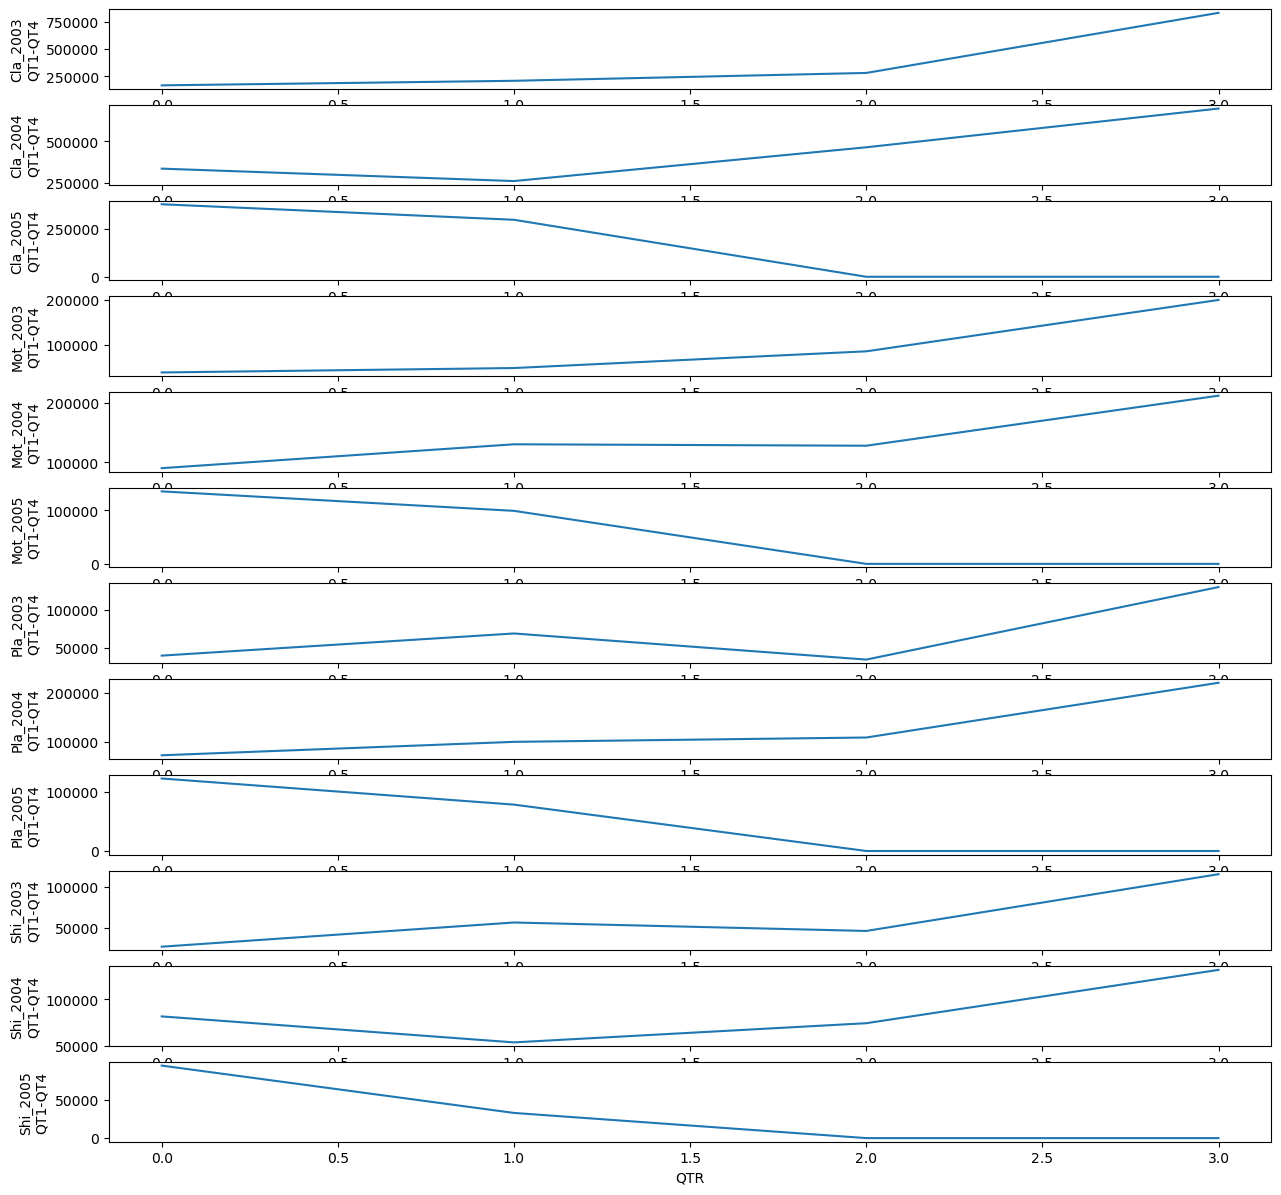

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar  9 13:46:04 2022

@author shames.y
cleaned up the code to utilize functions for plotting
"""


import pandas as pd
import numpy as np


df = pd.read_csv('sales_data_sample.csv', header = 0, encoding='Latin-1')
df.head(2)

Yvalues, Ycounts = np.unique(df['YEAR_ID'], return_counts=True)
#print(values, '\n', counts)  
#data covers years 2003, 2004, 2005
#[2003 2004 2005] 
#[1000 1345  478]

df.drop('ORDERNUMBER', inplace=True, axis=1)  #drop ordernumber column
df.drop('ORDERLINENUMBER', inplace=True, axis=1)  #drops orderlinenumber column
df.drop('STATUS', inplace=True, axis=1)  #drops orderlinenumber column
df.drop('ADDRESSLINE2', inplace=True, axis=1)  #drops orderlinenumber column
df.drop('QUANTITYORDERED', inplace=True, axis=1)  #drops Quantity Ordered column
df.drop('MSRP', inplace=True, axis=1)  #drops MSRP column
df.drop('CUSTOMERNAME', inplace=True, axis=1)  #drops MSRP column
df.drop('PHONE', inplace=True, axis=1)  #drops MSRP column
df.drop('ADDRESSLINE1', inplace=True, axis=1)  #drops MSRP column
df.drop('CITY', inplace=True, axis=1)  #drops MSRP column
df.drop('STATE', inplace=True, axis=1)  #drops MSRP column
df.drop('PRICEEACH', inplace=True, axis=1)  #drops MSRP column
df.drop('ORDERDATE', inplace=True, axis=1)  #drops MSRP column
df.drop('MONTH_ID', inplace=True, axis=1)  #drops MSRP column
df.drop('PRODUCTCODE', inplace=True, axis=1)
df.drop('POSTALCODE', inplace=True, axis=1)
df.drop('COUNTRY', inplace=True, axis=1)
df.drop('TERRITORY', inplace=True, axis=1)
df.drop('CONTACTLASTNAME', inplace=True, axis=1)
df.drop('CONTACTFIRSTNAME', inplace=True, axis=1)
df.drop('DEALSIZE', inplace=True, axis=1)

Pvalues, Pcounts = np.unique(df['PRODUCTLINE'], return_counts=True)
#print(values, '\n', counts) 
#['Classic Cars' 'Motorcycles' 'Planes' 'Ships' 'Trains' 'Trucks and Buses' 'Vintage Cars'] 
# [967            331          306       234     77       301                607]

Qvalues, Qcounts = np.unique(df['QTR_ID'], return_counts=True)
#print(Qvalues, '\n', Qcounts) 

#df.describe()
#lets narrow down our search to determine year, and productline type
#YEAR_QTR_All = df.groupby(["YEAR_ID","QTR_ID"])["PRODUCTLINE","QTR_ID","YEAR_ID"].agg(['mean','count','sum'])
##YEAR_QTR_All = df.groupby(["PRODUCTLINE","YEAR_ID","QTR_ID"])["SALES"].agg(['median','mean','count','sum'])
#YEAR_QTR_All = df.groupby(["PRODUCTLINE","YEAR_ID","QTR_ID"]).agg(['median','mean','count','sum'])
##COUNTRY_YEAR_QTR_All = df.groupby(["COUNTRY","PRODUCTLINE","YEAR_ID","QTR_ID"])["SALES"].agg(['median','mean','count','sum'])
##Contact_COUNTRY_YEAR_QTR_All = df.groupby(["CONTACTLASTNAME","COUNTRY","PRODUCTLINE","YEAR_ID","QTR_ID"])["SALES"].agg(['median','mean','count','sum'])

#convert to a function
"""
M_20031 = df[
    (df["PRODUCTLINE"]=='Motorcycles') &
    (df["YEAR_ID"]==2003) &
    (df["QTR_ID"]==1) 
    ]
M_20031.drop('PRODUCTLINE', inplace=True, axis=1)
"""
#make a copy dataframe
dfbackup = df 

#filter the data we want to gets some stats
ULIST = {}
ULIST2 = {}  #user for Normalizations data
ULIST3 = {}  #used for Z_score data

for Pvals in Pvalues:
    for Yvals in Yvalues:
        for Qtrs in Qvalues:
            #print(Pvals, Yvals, Qtrs)
            UvariableN = f'{Pvals[:3]}_{Yvals}{Qtrs}'
            UvariableD = UvariableN
            try:
                UvariableD = dfbackup[
                    (dfbackup["PRODUCTLINE"]==Pvals) &
                    (dfbackup["YEAR_ID"]==Yvals) &
                    (dfbackup["QTR_ID"]==Qtrs) 
                    ]
                #UvariableD.drop('PRODUCTLINE', inplace=True, axis=1)    
            #print(Uvariable)
            except SettingWithCopyWarning:
                UvariableD = "No Data"
            finally:
                ULIST[UvariableN]=UvariableD
            
## add some plots using matplotlib 
import matplotlib.pyplot as plt
fig, axs = plt.subplots(12)
fig.set_size_inches(15.0, 15.0)
fig.set_dpi(100)

#simple function to ease the paperwork
def sales_plot(Pchoice, choice, counter, str_indextext):
    LOPi = str(str_indextext)
    LOP = str(str_indextext[:8])
    #index = int()
    LOP1 = f'{LOP}{1}'
    LOP2 = f'{LOP}{2}'
    LOP3 = f'{LOP}{3}'
    LOP4 = f'{LOP}{4}'
        
    axs[int(counter)].set_ylabel(str_indextext[:8]+'\nQT1-QT4')
    axs[int(counter)].set_xlabel("QTR")
    
    
    if choice == 1:    
        LOPi = [ULIST[LOP1]["SALES"].sum(), ULIST[LOP2]["SALES"].sum(), ULIST[LOP3]["SALES"].sum(), ULIST[LOP4]["SALES"].sum()]
    elif choice == 2:
        LOPi = [ULIST[LOP1]["SALES"].median(), ULIST[LOP2]["SALES"].median(), ULIST[LOP3]["SALES"].median(), ULIST[LOP4]["SALES"].median()]
    elif choice == 3:
        LOPi = [ULIST[LOP1]["SALES"].mean(), ULIST[LOP2]["SALES"].mean(), ULIST[LOP3]["SALES"].mean(), ULIST[LOP4]["SALES"].mean()]
    else:  #choice == 4:
        LOPi = [ULIST[LOP1]["SALES"].sum(), ULIST[LOP2]["SALES"].sum(), ULIST[LOP3]["SALES"].sum(), ULIST[LOP4]["SALES"].sum()]
    
    if Pchoice == 1:
        return axs[int(counter)].hist(LOPi)
   
    if Pchoice == 2:
        return axs[int(counter)].plot(LOPi)
   
    if Pchoice == 3:
        return axs[int(counter)].scatter(LOPi,(1,2,3,4))
   
#print(ULIST['Cla_20031'])
#print(ULIST.keys())

#make a generic list so we can index through them
listofproducts = []
for items in ULIST:
    listofproducts.append(items)
#    print(items)
# print(listofproducts[:12]) # test successful
#print(len(listofproducts))

# since we know there are 4 qtrs per year and year starts at 2003, 
# we can us this as our indexer to cycle through the list to create some graphs
count = 0

#before plotting lets askfor input as to what kind of result to find
#1 = sum
#2 = median
#3 = mean

Pchoice = int(input('Chart Type:  1=HISTO, 2=PLOT, 3=Scatter:  '))
choice = int(input('what type of result:  1=sum, 2=median, 3=mean, 4=sum:  '))

for indexer in range(0,len(listofproducts)+1,4):
    str_index = listofproducts[indexer]
    #print(str_index)
    if count <= 11:
        sales_plot(Pchoice, choice, count, str_index)
        #print(count)
    else:
        break
    count +=1

plt.show()
#things to fix xlabels, xaxis to reflect qtr 1 -4, maybe change to 3x4 grid

#===========code additions
## lets normalize some data
def normalize_data(X, X_max, X_min):
    normalized_value = (X-X_min)/(X_max-X_min)
    return normalized_value

## lets normalize some data
def calc_z_score(X, mean, std):
    z_score = (X-mean)/std
    return z_score

#print('='*28+"Normalize Data "+'='*28 )
for item in ULIST:
    stuff = ULIST[item]['SALES']
    stuff = stuff.reset_index(drop=True)  #reindexing cause column holds prior order number
    #print(item, end='\n')
    #print(normalize_data(stuff, stuff.max(), stuff.min())) 
    ULIST2[item]= normalize_data(stuff, stuff.max(), stuff.min())
    #capture the data we normalized   
#verify results    
#print(ULIST2.values(), end='\n')
    
#print('='*28+"calc Z SCORE "+'='*28 )
for item2 in ULIST:
    stuff2 = ULIST[item2]['SALES']
    stuff2 = stuff2.reset_index(drop=True) #reindexing cause column holds prior order number
    #print(item2, end='\n')
    #print(calc_z_score(stuff2, stuff2.mean(), stuff2.std()))
    ULIST3[item2]= calc_z_score(stuff2, stuff2.mean(), stuff2.std())
    #capture the data we z_scored    
#verify results
#print(ULIST3.values(), end='\n')

#work on adding data to boxplots with productline, year, qtr

## 10.3 Lottery project (Group)

**Write a program that will do the following:**
1. Read in the following 2 files:  NCEL-Cash5.csv and NCEL-Cash5-Detailed.csv
2. Calculate the return on investment (ROI) from playing the same 5 numbers every time the game is offered.
3. Calculate the ROI from playing 5 random numbers on each draw.
4. For an added challenge, change this calculation to occur starting at an arbitrary start date (rather than the beginning of the data set).
5. For an even greater challenge, run multiple trials for the above setup and report the average ROI for each.

**Notes for calculating winnings:**
1. Ball order does not matter.
2. Costs \\$1 for each draw (ie. \\$2 for days that have double play)
3. Each draw is five numbers and range from 1 to 43
4. May 15, 2014 balls drawn changed from 39 -> 41
5. Nov 4, 2018  balls drawn changed from 41 -> 43

**Winners are as follows:**
1. Match 0 balls = \$0
2. Match 1 ball = \$0
3. Match 2 balls = \$1
4. Match 3 balls = \$5
5. Match 4 balls = use prize_4 or prize_4_double_play from Detailed file
6. Match 5 balls = use prize_5 or prize_5_double_play from Detailed file


**Output the following:**
1. 5 numbers played
2. dollars spent playing
3. dollars won
4. return on investment as a percentage


**Just for fun: What happened on July 11, 2007?**
&nbsp;


<center> <b> NCEL-Cash5.csv format: </b> </center>

| Date:  | Ball N:  | DP: 0 - False, 1 - True |
|--------|----------|-------------------------|
|date of drawing | winning ball numbers  | "Double Play" | 
| (m/d/Y) | in order drawn | , or second play of the day. |
|         |           |  First introduced 4/25/2021 |                             

&nbsp;  

<center> <b> NCEL-Cash5-Detailed.csv format: </b> </center>


| Date: | prize_n: | winners_n: | *_double_play_*: |
|-------|----------|------------|------------------|
| date of drawing | prize amount for matching | winner count for | double play value |
| (m/d/Y) | n numbers correctly | matching n numbers. |for that winner amount or prize pool. |


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 16 11:07:29 2022

@author: shames y
"""

import pandas as pd
import numpy as np
import random
import locale

def gen_5_numbers():
    numbers = []
    count = 0
    while count < 5:
        numbers.append(random.randint(1,39))
        count += 1
    return numbers


def win_lotto(df, my_numbers):
    
    numberlist = df[:].loc(1)
    string = numberlist["Ball 1","Ball 2","Ball 3","Ball 4","Ball 5"]
    counter = 0 
    myn= my_numbers
    n1,n2,n3,n4,n5,n6 = str(string.values[counter]).split(".")
    n1 = n1[1:]
    n6 = n6[:3]  #leaving this out
    winn = [int(n1), int(n2), int(n3), int(n4), int(n5)] 
    
   
    total_losses = 1
    highest_match = 0

    while myn != winn:
        match =0
        total_losses += 1
        
        n1,n2,n3,n4,n5,n6 = str(string.values[counter]).split(".")
        n1 = n1[1:]
        n6 = n6[:3]  #leaving this out
        winn = [int(n1), int(n2), int(n3), int(n4), int(n5)] 
        
        for number in myn:
            if number in winn:
                match+=1
                 
        if match > highest_match:
            highest_match = match
            historycounter = counter 
            
        total_losses_formatted = locale.format_string("%d",total_losses, grouping=True)
        #print("Highest Match: {}. Ticket_match: {}.  Tickets_Purchased: {}   !{} !!{}"
        #      .format(highest_match, match, total_losses_formatted, myn, winn))
             
        if match == 5:
            #print('Won after {} tries'.format(historycounter))
            dollar = dfJOINED["prize_5"].values[historycounter-5801]
            percent = ((dollar - historycounter)/historycounter)*100
            print(f'With 5 matches, ${dollar} with ROI from {historycounter} tries, at {percent}%')
            break
        elif counter == 5801:
            #print('Won after {} tries, with: {} matches '.format(historycounter, highest_match, historycounter))
            print(string.values[historycounter])
            dollar = dfJOINED["prize_4"].values[historycounter-5801]
            percent = ((dollar-historycounter)/historycounter)*100
            print(f'With {highest_match} matches, ${dollar} with ROI from {historycounter} tries, at {percent:.2f}%')
            break
       
        counter += 1
        
       


my_numbers = gen_5_numbers()

#win_lotto(winning_numbers)
"""
1. Read in the following 2 files:  NCEL-Cash5.csv and NCEL-Cash5-Detailed.csv
2. Calculate the return on investment (ROI) from playing the same 5 numbers every time the game is offered.
3. Calculate the ROI from playing 5 random numbers on each draw.
4. For an added challenge, change this calculation to occur starting at an arbitrary start date (rather than the beginning of the data set).
5. For an even greater challenge, run multiple trials for the above setup and report the average ROI for each.
"""
              
dfN = pd.read_csv('NCEL-Cash5.csv', header = 0)
dfND = pd.read_csv('NCEL-Cash5-Detailed.csv', header = 0)


dfN.drop(index=5802, inplace=True)
#print(dfN.tail())
#print(dfND.tail())
# confirmed last entry was removed.

#lets join the two files after sorting dfN
dfN.sort_index(ascending=False, inplace=True)

#print(dfN.head())
#descending order confirmed

#join files
dfJOINED = dfN.join(dfND.set_index(['date']), on=['Date'])

print(my_numbers)
numberlist = dfN[:].loc(1)

win_lotto(dfN, my_numbers)

#things to fix... duplicate values in random string
#fix rare occassion of on first try 5 matches.

[29, 20, 26, 12, 20]
[29. 34. 20. 38. 12.]
With 4 matches, $250 with ROI from 518 tries, at -51.74%
